=== Aturan Pohon Keputusan ===
|--- Affected_Area <= 3.50
|   |--- Severity <= 0.50
|   |   |--- Duration <= 107.50
|   |   |   |--- Duration <= 96.50
|   |   |   |   |--- class: 0
|   |   |   |--- Duration >  96.50
|   |   |   |   |--- class: 0
|   |   |--- Duration >  107.50
|   |   |   |--- Age <= 75.50
|   |   |   |   |--- class: 5
|   |   |   |--- Age >  75.50
|   |   |   |   |--- class: 4
|   |--- Severity >  0.50
|   |   |--- Duration <= 109.50
|   |   |   |--- Age <= 62.50
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  62.50
|   |   |   |   |--- class: 3
|   |   |--- Duration >  109.50
|   |   |   |--- Previous_Treatment <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Previous_Treatment >  0.50
|   |   |   |   |--- class: 3
|--- Affected_Area >  3.50
|   |--- Age <= 24.50
|   |   |--- Age <= 21.50
|   |   |   |--- Age <= 19.50
|   |   |   |   |--- class: 3
|   |   |   |--- Age >  19.50
|   |   |   |   |--- class: 5
|   |   |--- Age >  21.50
|   |   |   |--- Durati

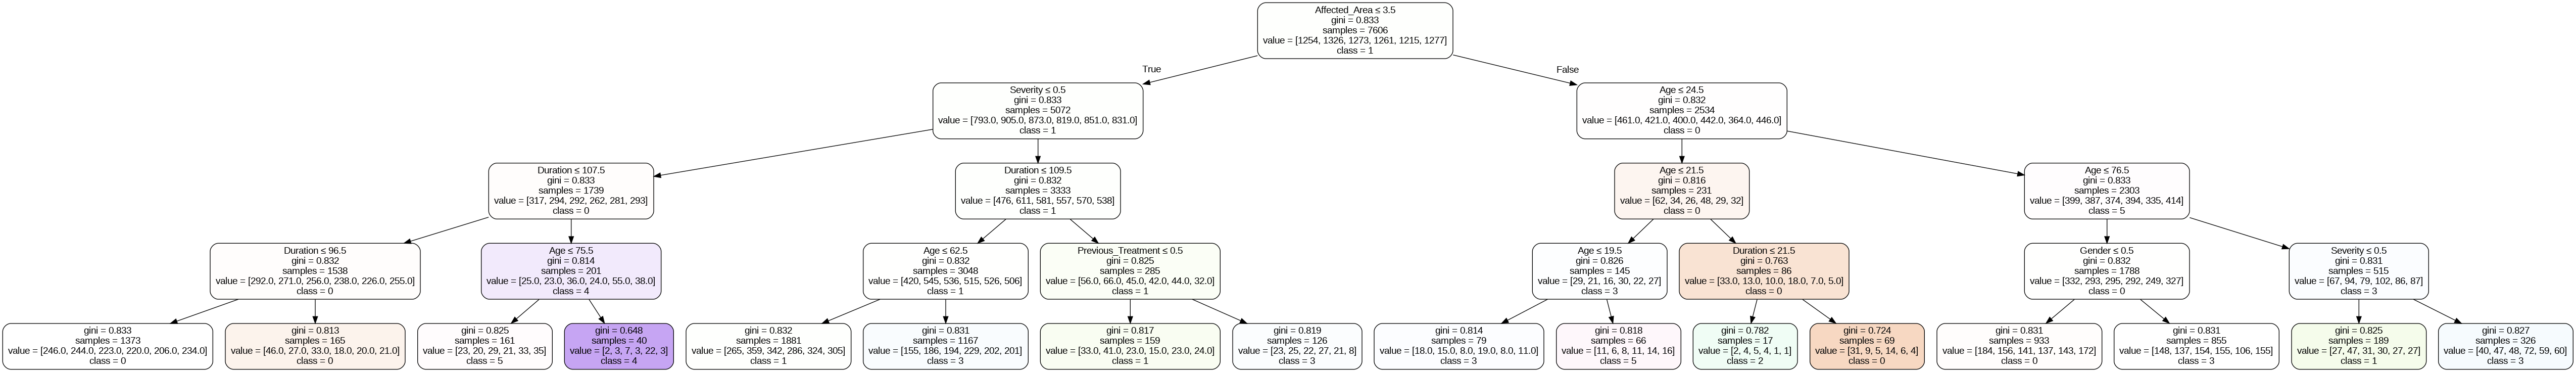

In [ ]:

!apt-get -qq install -y graphviz
!pip install graphviz

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import graphviz
from IPython.display import Image

df = pd.read_csv("askin_disease_dataset.csv")
df = df.drop(columns=["Patient_ID"])

label_encoders = {}
for col in df.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=["Disease_Type"])
y = df["Disease_Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

rules_text = export_text(model, feature_names=list(X.columns))
print("=== Aturan Pohon Keputusan ===")
print(rules_text)

dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=X.columns,
    class_names=[str(cls) for cls in sorted(y.unique())],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("decision_tree_colab", format="png", cleanup=True)
from IPython.display import Image
Image(filename="decision_tree_colab.png")


In [ ]:

class DecisionNode:
    def __init__(self, attribute=None, threshold=None, left=None, right=None, value=None):
        self.attribute = attribute
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

def make_decision_tree():
    root = DecisionNode(attribute="Affected_Area", threshold=3.50)

    left_subtree = DecisionNode(attribute="Severity", threshold=0.50)

    left_left_subtree = DecisionNode(attribute="Duration", threshold=107.50)

    left_left_left_subtree = DecisionNode(attribute="Duration", threshold=96.50)
    left_left_left_subtree.left = DecisionNode(value=0)
    left_left_left_subtree.right = DecisionNode(value=0)

    left_left_right_subtree = DecisionNode(attribute="Age", threshold=75.50)
    left_left_right_subtree.left = DecisionNode(value=5)
    left_left_right_subtree.right = DecisionNode(value=4)

    left_left_subtree.left = left_left_left_subtree
    left_left_subtree.right = left_left_right_subtree

    left_right_subtree = DecisionNode(attribute="Duration", threshold=109.50)

    left_right_left_subtree = DecisionNode(attribute="Age", threshold=62.50)
    left_right_left_subtree.left = DecisionNode(value=1)
    left_right_left_subtree.right = DecisionNode(value=3)

    left_right_right_subtree = DecisionNode(attribute="Previous_Treatment", threshold=0.50)
    left_right_right_subtree.left = DecisionNode(value=1)
    left_right_right_subtree.right = DecisionNode(value=3)

    left_right_subtree.left = left_right_left_subtree
    left_right_subtree.right = left_right_right_subtree

    left_subtree.left = left_left_subtree
    left_subtree.right = left_right_subtree

    right_subtree = DecisionNode(attribute="Age", threshold=24.50)

    right_left_subtree = DecisionNode(attribute="Age", threshold=21.50)

    right_left_left_subtree = DecisionNode(attribute="Age", threshold=19.50)
    right_left_left_subtree.left = DecisionNode(value=3)
    right_left_left_subtree.right = DecisionNode(value=5)

    right_left_right_subtree = DecisionNode(attribute="Duration", threshold=21.50)
    right_left_right_subtree.left = DecisionNode(value=2)
    right_left_right_subtree.right = DecisionNode(value=0)

    right_left_subtree.left = right_left_left_subtree
    right_left_subtree.right = right_left_right_subtree

    right_right_subtree = DecisionNode(attribute="Age", threshold=76.50)

    right_right_left_subtree = DecisionNode(attribute="Gender", threshold=0.50)
    right_right_left_subtree.left = DecisionNode(value=0)
    right_right_left_subtree.right = DecisionNode(value=3)

    right_right_right_subtree = DecisionNode(attribute="Severity", threshold=0.50)
    right_right_right_subtree.left = DecisionNode(value=1)
    right_right_right_subtree.right = DecisionNode(value=3)

    right_right_subtree.left = right_right_left_subtree
    right_right_subtree.right = right_right_right_subtree

    right_subtree.left = right_left_subtree
    right_subtree.right = right_right_subtree

    root.left = left_subtree
    root.right = right_subtree

    return root

def predict(node, sample):
    if node.value is not None:
        return node.value

    if sample[node.attribute] <= node.threshold:
        return predict(node.left, sample)
    else:
        return predict(node.right, sample)

def get_user_input():
    print("\n=== Masukkan Data Pasien ===")
    data = {}

    data['Age'] = float(input("Usia Pasien: "))
    data['Gender'] = float(input("Jenis Kelamin (0=Laki-laki, 1=Perempuan): "))
    data['Severity'] = float(input("Tingkat Keparahan (0-1): "))
    data['Duration'] = float(input("Durasi Kondisi (hari): "))
    data['Affected_Area'] = float(input("Luas Area yang Terkena (0-10): "))
    data['Previous_Treatment'] = float(input("Perawatan Sebelumnya (0=Tidak, 1=Ya): "))

    return data

def explain_class(class_num):
    explanations = {
        0: "Tidak perlu perawatan khusus",
        1: "Perawatan dasar diperlukan",
        2: "Perawatan intensif jangka pendek",
        3: "Perawatan khusus dengan pengawasan",
        4: "Perawatan lanjutan untuk usia tua",
        5: "Perawatan khusus untuk kondisi serius"
    }
    return explanations.get(class_num, "Kelas tidak dikenali")

def get_disease_name(class_num):
    diseases = {
        0: "Dermatitis Ringan",
        1: "Eksim",
        2: "Psoriasis",
        3: "Melanoma",
        4: "Vitiligo",
        5: "Infeksi Kulit Parah"
    }
    return diseases.get(class_num, "Penyakit tidak dikenali")

def main():
    decision_tree = make_decision_tree()

    print("=== Sistem Klasifikasi Perawatan Kesehatan ===")
    print("Silakan masukkan data pasien untuk menentukan klasifikasi perawatan.\n")

    while True:
        patient_data = get_user_input()

        prediction = predict(decision_tree, patient_data)

        print("\n=== Hasil Klasifikasi ===")
        print(f"Kelas Perawatan: {prediction}")
        print(f"Rekomendasi: {explain_class(prediction)}")
        print(f"Prediksi Penyakit Kulit: {get_disease_name(prediction)}")


        lanjut = input("\nApakah ingin melakukan klasifikasi lagi? (y/n): ").lower()
        if lanjut != 'y':
            print("\nTerima kasih telah menggunakan sistem ini.")
            break

if __name__ == "__main__":
    main()

=== Sistem Klasifikasi Perawatan Kesehatan ===
Silakan masukkan data pasien untuk menentukan klasifikasi perawatan.


=== Masukkan Data Pasien ===

=== Hasil Klasifikasi ===
Kelas Perawatan: 3
Rekomendasi: Perawatan khusus dengan pengawasan
Prediksi Penyakit Kulit: Melanoma
